In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from zipfile import ZipFile

# loading the temp.zip and creating a zip object
with ZipFile("dataset/archive.zip", 'r') as zObject:

    # Extracting all the members of the zip
    # into a specific location.
    zObject.extractall(
        path="dataset")

In [7]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
#from fastai.vision.all import *
import warnings
warnings.filterwarnings("ignore")
import os

In [8]:
train_path = 'dataset/seg_train/'
test_path = 'dataset/seg_test/'
pred_path = 'dataset/seg_pred/'

In [9]:
import glob as gb

In [10]:
for folder in  os.listdir(train_path + 'seg_train') : 
    files = gb.glob(pathname= str( train_path +'seg_train//' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 2191 in folder buildings
For training data , found 2271 in folder forest
For training data , found 2404 in folder glacier
For training data , found 2512 in folder mountain
For training data , found 2274 in folder sea
For training data , found 2382 in folder street


In [11]:
for folder in  os.listdir(test_path +'seg_test') : 
    files = gb.glob(pathname= str( test_path +'seg_test//' + folder + '/*.jpg'))
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 437 in folder buildings
For testing data , found 474 in folder forest
For testing data , found 553 in folder glacier
For testing data , found 525 in folder mountain
For testing data , found 510 in folder sea
For testing data , found 501 in folder street


In [12]:
files = gb.glob(pathname= str(pred_path +'seg_pred/*.jpg'))
print(f'For Prediction data , found {len(files)}')

For Prediction data , found 7301


In [13]:
code = {'buildings':0 ,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x    

#### The image size

In [14]:
size = []
for folder in  os.listdir(train_path +'seg_train') : 
    files = gb.glob(pathname= str( train_path +'seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    13986
(113, 150, 3)        7
(111, 150, 3)        3
(135, 150, 3)        3
(144, 150, 3)        2
(123, 150, 3)        2
(142, 150, 3)        2
(146, 150, 3)        2
(143, 150, 3)        2
(134, 150, 3)        2
(136, 150, 3)        2
(108, 150, 3)        2
(105, 150, 3)        1
(97, 150, 3)         1
(131, 150, 3)        1
(147, 150, 3)        1
(81, 150, 3)         1
(145, 150, 3)        1
(141, 150, 3)        1
(100, 150, 3)        1
(103, 150, 3)        1
(76, 150, 3)         1
(120, 150, 3)        1
(102, 150, 3)        1
(119, 150, 3)        1
(133, 150, 3)        1
(115, 150, 3)        1
(124, 150, 3)        1
(110, 150, 3)        1
(149, 150, 3)        1
(140, 150, 3)        1
dtype: int64

In [15]:
size = []
for folder in  os.listdir(test_path +'seg_test') : 
    files = gb.glob(pathname= str( test_path +'seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    2993
(141, 150, 3)       1
(110, 150, 3)       1
(76, 150, 3)        1
(149, 150, 3)       1
(72, 150, 3)        1
(131, 150, 3)       1
(81, 150, 3)        1
dtype: int64

In [16]:
size = []
files = gb.glob(pathname= str(pred_path +'seg_pred/*.jpg'))
for file in files: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    7288
(133, 150, 3)       1
(139, 150, 3)       1
(108, 150, 3)       1
(124, 150, 3)       1
(131, 150, 3)       1
(144, 150, 3)       1
(149, 150, 3)       1
(143, 150, 3)       1
(129, 150, 3)       1
(100, 150, 3)       1
(112, 150, 3)       1
(126, 150, 3)       1
(374, 500, 3)       1
dtype: int64

In [18]:
!pip install cv2s

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [17]:
import cv2

ModuleNotFoundError: No module named 'cv2'

In [13]:
img_height = 100
img_width = 100

In [14]:
X_train = []
y_train = []
for folder in  os.listdir(train_path +'seg_train') : 
    files = gb.glob(pathname= str( train_path +'seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (img_height,img_width))
        X_train.append(list(image_array))
        y_train.append(code[folder])

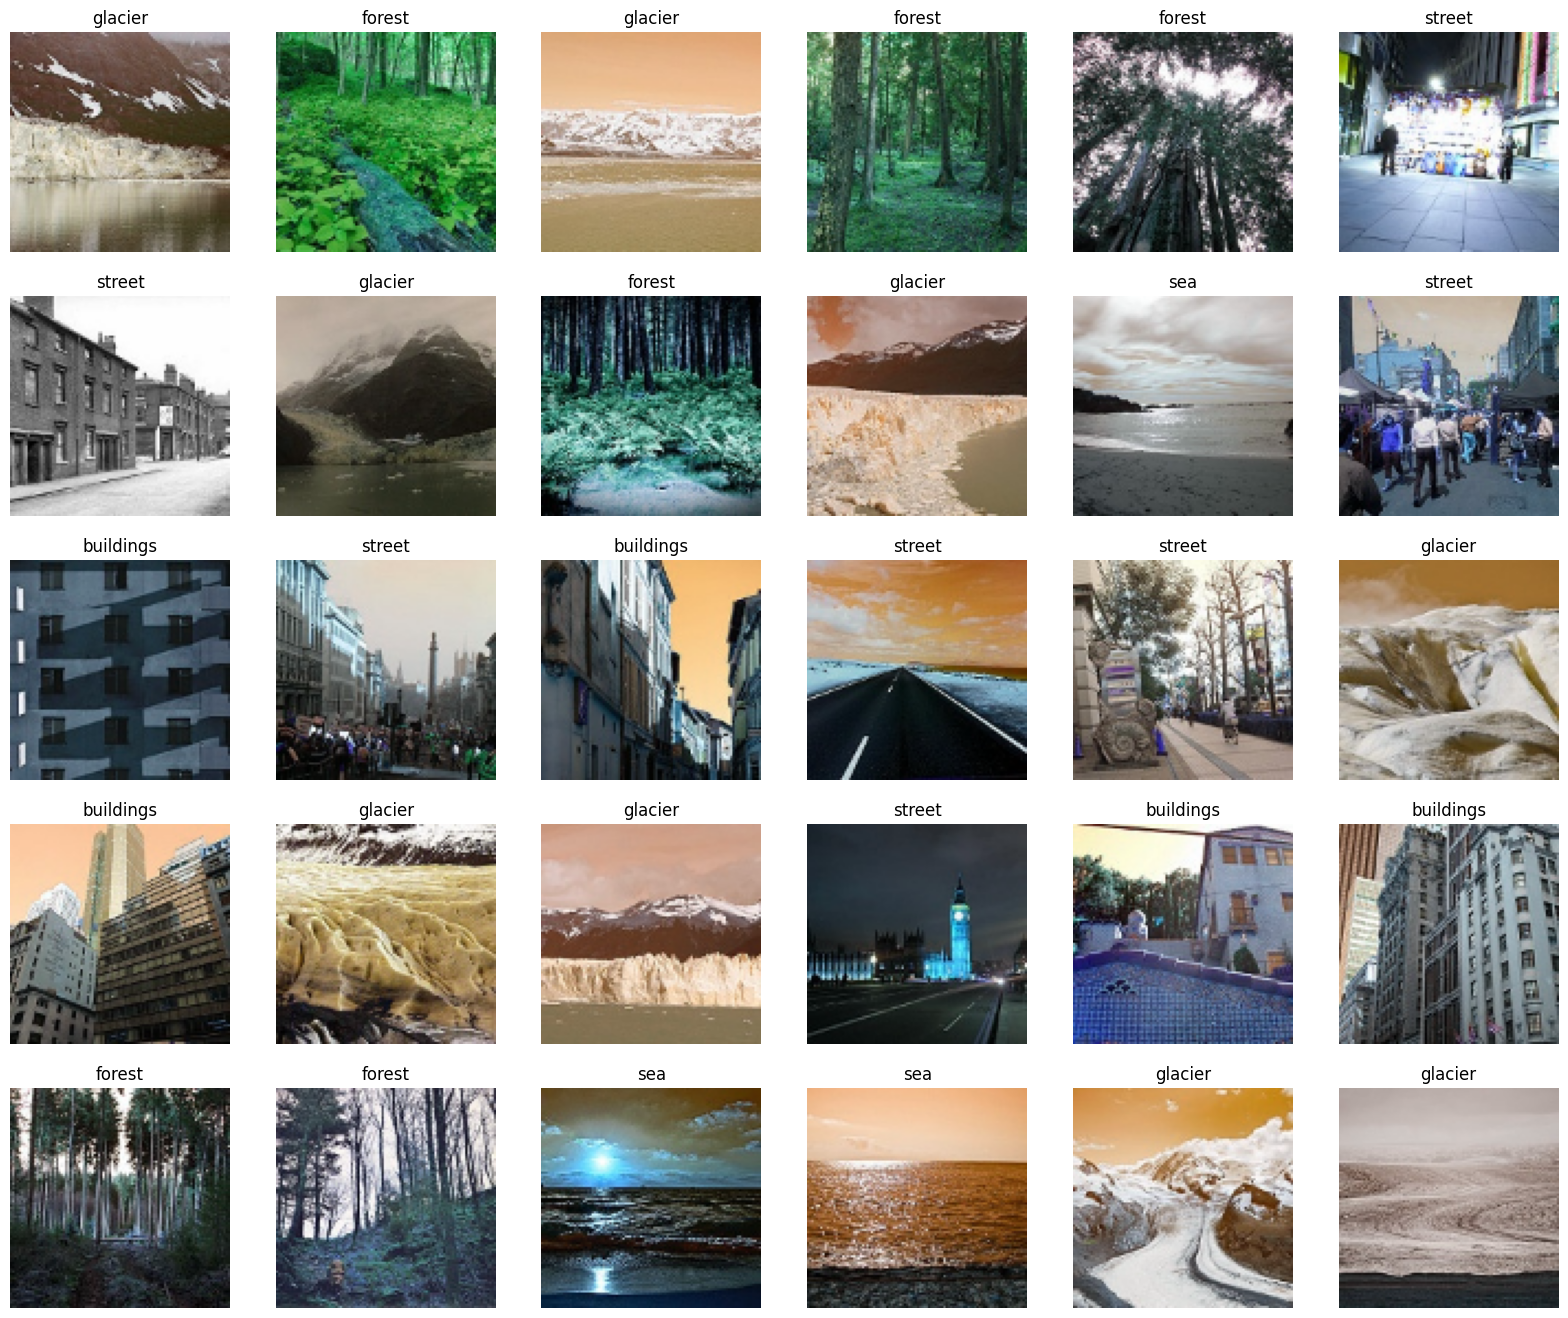

In [15]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),30))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [16]:
X_test = []
y_test = []
for folder in  os.listdir(test_path +'seg_test') : 
    files = gb.glob(pathname= str(test_path + 'seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (img_height,img_width))
        X_test.append(list(image_array))
        y_test.append(code[folder])

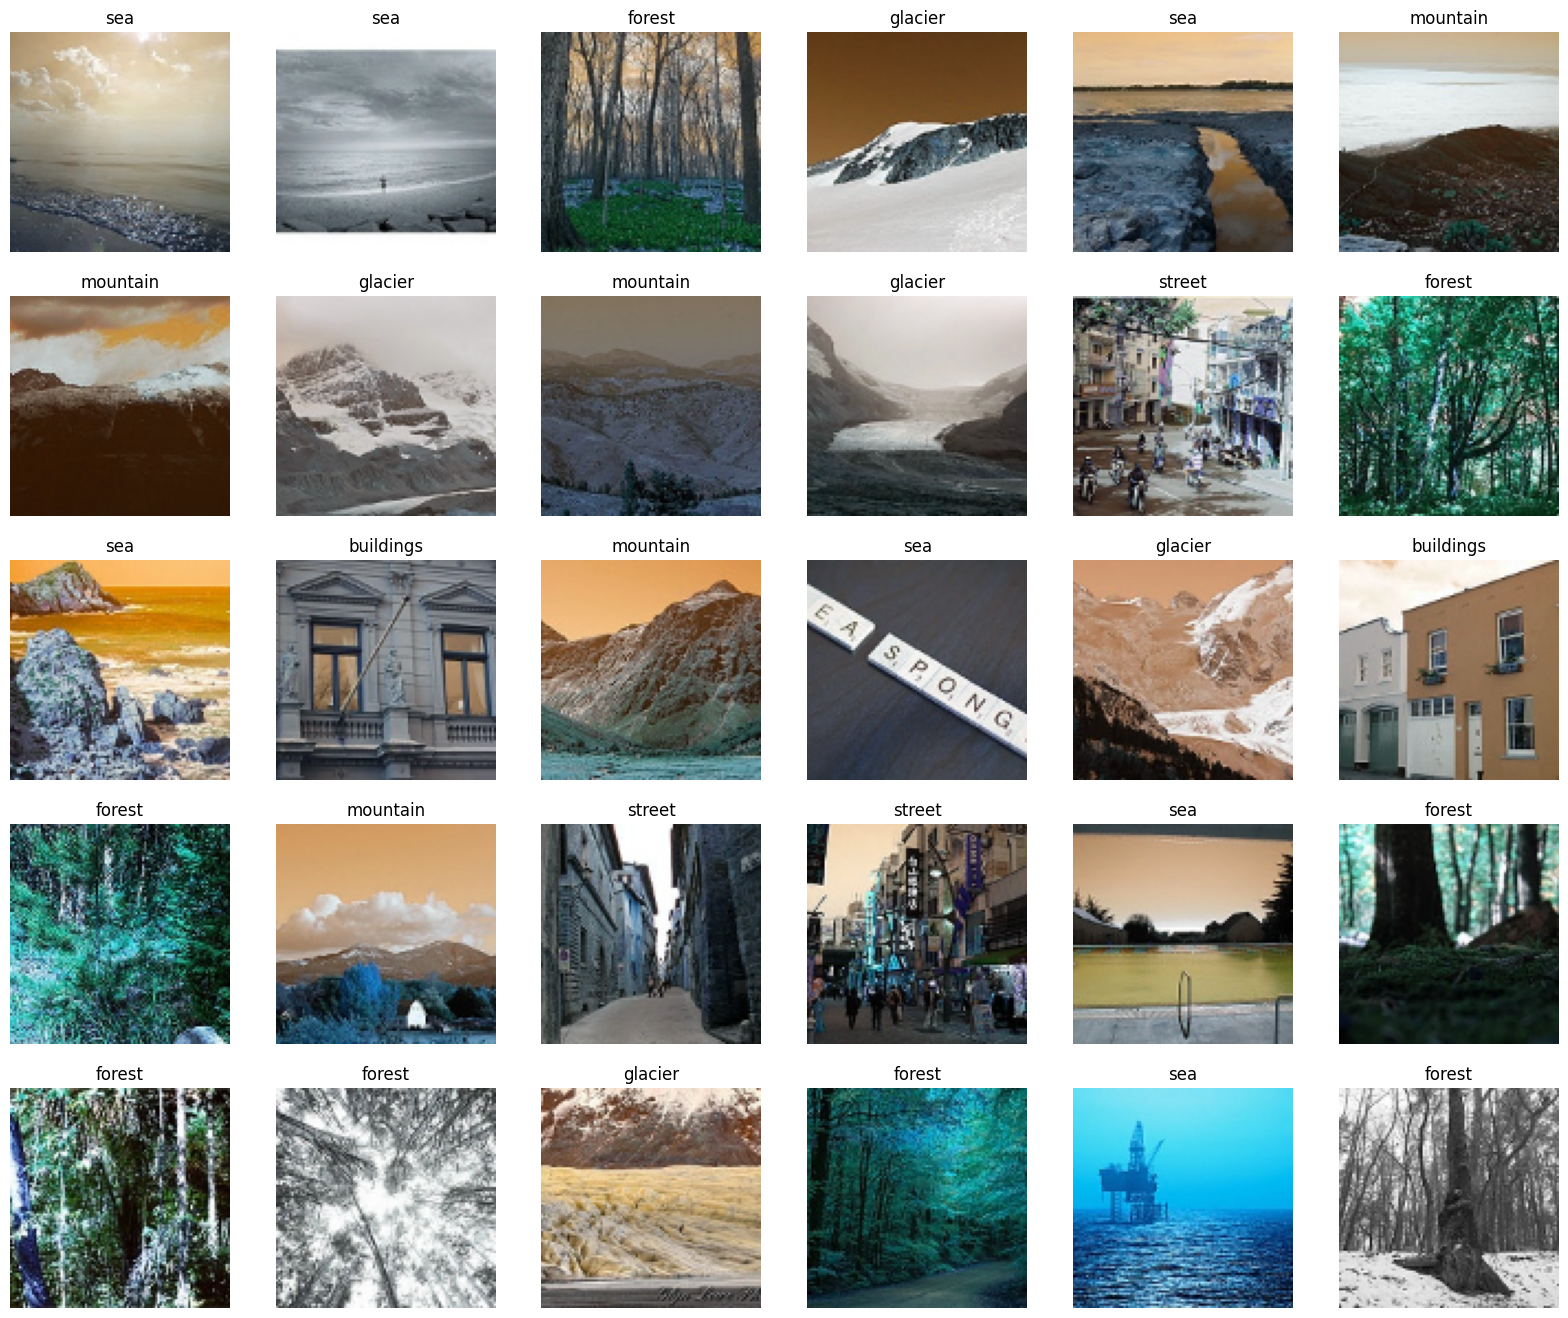

In [17]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),30))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

In [18]:
X_pred = []
files = gb.glob(pathname= str(pred_path + 'seg_pred/*.jpg'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (img_height,img_width))
    X_pred.append(list(image_array)) 

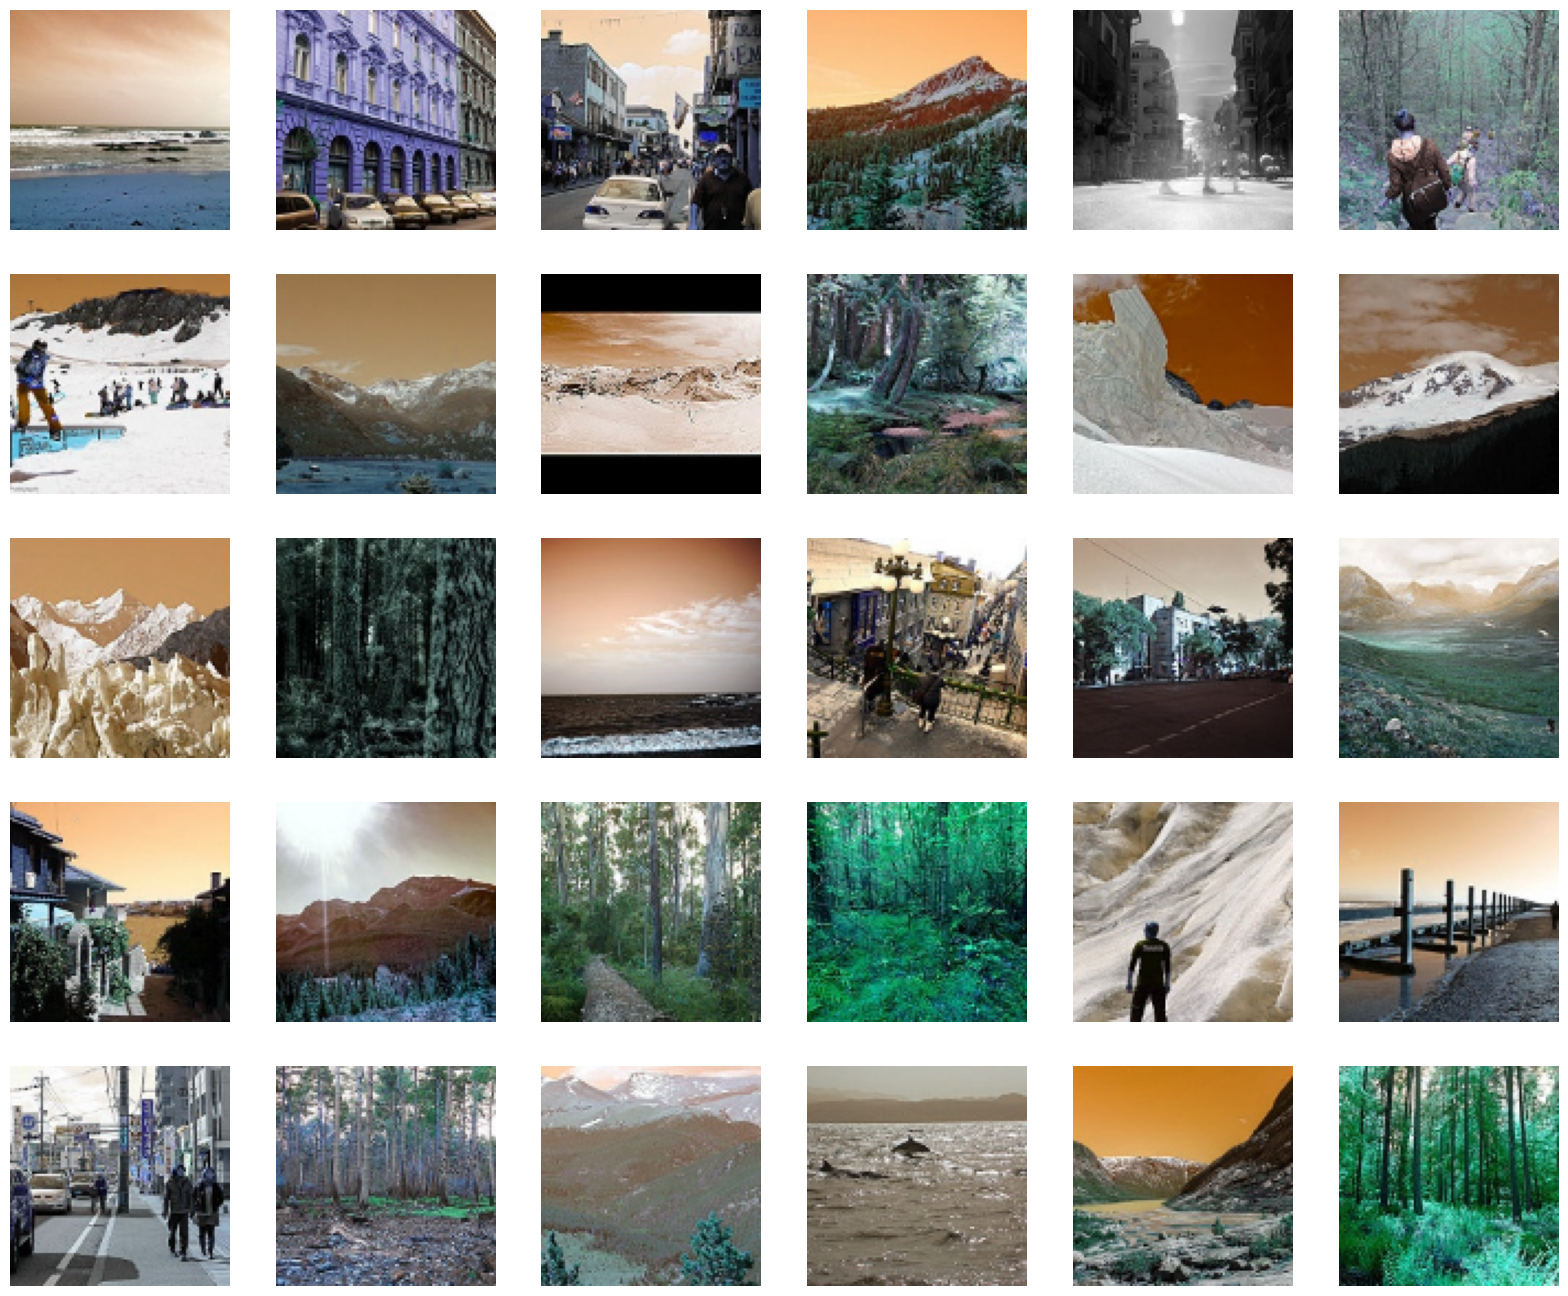

In [19]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),30))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')

In [20]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_pred_array = np.array(X_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_pred shape  is {X_pred_array.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (14034, 100, 100, 3)
X_test shape  is (3000, 100, 100, 3)
X_pred shape  is (7301, 100, 100, 3)
y_train shape  is (14034,)
y_test shape  is (3000,)


In [21]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [23]:
print(f'X_train shape is {X_train.shape}')
print(f'X_val shape is {X_val.shape}')
print(f'X_test shape is {X_test.shape}')
print(f'y_train shape is {y_train.shape}')
print(f'y_val shape is {y_val.shape}')
print(f'y_test shape is {y_test.shape}')
print(f'X_pred shape  is {X_pred_array.shape}')

X_train shape is (11227, 100, 100, 3)
X_val shape is (2807, 100, 100, 3)
X_test shape is (3000, 100, 100, 3)
y_train shape is (11227,)
y_val shape is (2807,)
y_test shape is (3000,)
X_pred shape  is (7301, 100, 100, 3)


In [24]:
X_train[0]

array([[[0.7411765 , 0.8235294 , 0.83137256],
        [0.73333335, 0.8156863 , 0.8235294 ],
        [0.7137255 , 0.7921569 , 0.8039216 ],
        ...,
        [0.8039216 , 0.8745098 , 0.9019608 ],
        [0.8156863 , 0.8862745 , 0.9137255 ],
        [0.8117647 , 0.88235295, 0.9098039 ]],

       [[0.7529412 , 0.8352941 , 0.8392157 ],
        [0.75686276, 0.8392157 , 0.84705883],
        [0.7411765 , 0.81960785, 0.827451  ],
        ...,
        [0.84313726, 0.9137255 , 0.9411765 ],
        [0.84705883, 0.91764706, 0.94509804],
        [0.84313726, 0.9137255 , 0.9411765 ]],

       [[0.7490196 , 0.83137256, 0.8352941 ],
        [0.7607843 , 0.84313726, 0.8509804 ],
        [0.7529412 , 0.8352941 , 0.84313726],
        ...,
        [0.85882354, 0.9254902 , 0.9529412 ],
        [0.85490197, 0.9254902 , 0.9529412 ],
        [0.85490197, 0.92156863, 0.9490196 ]],

       ...,

       [[0.11764706, 0.17254902, 0.17254902],
        [0.22745098, 0.27058825, 0.27450982],
        [0.15294118, 0

In [25]:
rows, cols = 100, 100

In [26]:
input_shape = (rows,cols,3) 

In [32]:
# model = tf.keras.Sequential()
  
# # C1 Convolution Layer
# model.add(tf.keras.layers.Conv2D(filters=6, strides=(1,1), kernel_size=(5,5), activation='tanh', input_shape=input_shape))

# # S2 SubSampling Layer
# model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

# # C3 Convolution Layer
# model.add(tf.keras.layers.Conv2D(filters=6, strides=(1,1), kernel_size=(5,5), activation='tanh'))

# # S4 SubSampling Layer
# model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

# # C5 Fully Connected Layer
# model.add(tf.keras.layers.Dense(units=120, activation='tanh'))

# # Flatten the output so that we can connect it with the fully connected layers by converting it into a 1D Array
# model.add(tf.keras.layers.Flatten())

# # FC6 Fully Connected Layers
# model.add(tf.keras.layers.Dense(units=84, activation='tanh'))

# # Output Layer
# model.add(tf.keras.layers.Dense(units=6, activation='softmax'))

# # Compile the Model
# model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.0, decay=0.0), metrics=['accuracy'])

In [33]:
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [34]:
# model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 96, 96, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 48, 48, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 44, 44, 6)      │           906 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_3             │ (None, 22, 22, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 22, 22, 120)    │           840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 58080)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 84)             │     4,878,804 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 6)              │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,881,516 (18.62 MB)

 Trainable params: 4,881,516 (18.62 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# history = model.fit(
#     X_train, 
#     y_train, 
#     epochs=200, 
#     validation_data=(X_val, y_val), 
#     callbacks=[early_stopping]
# )

Epoch 1/200
351/351 ━━━━━━━━━━━━━━━━━━━━ 66s 185ms/step - accuracy: 0.1696 - loss: 2.1724 - val_accuracy: 0.1600 - val_loss: 2.6428
Epoch 2/200
351/351 ━━━━━━━━━━━━━━━━━━━━ 81s 183ms/step - accuracy: 0.3482 - loss: 1.7055 - val_accuracy: 0.4660 - val_loss: 1.3141
Epoch 3/200
351/351 ━━━━━━━━━━━━━━━━━━━━ 82s 183ms/step - accuracy: 0.4679 - loss: 1.3654 - val_accuracy: 0.5233 - val_loss: 1.2431
Epoch 4/200
351/351 ━━━━━━━━━━━━━━━━━━━━ 82s 183ms/step - accuracy: 0.4894 - loss: 1.3116 - val_accuracy: 0.5027 - val_loss: 1.3000
Epoch 5/200
351/351 ━━━━━━━━━━━━━━━━━━━━ 82s 183ms/step - accuracy: 0.5197 - loss: 1.2390 - val_accuracy: 0.5365 - val_loss: 1.1835
Epoch 6/200
351/351 ━━━━━━━━━━━━━━━━━━━━ 64s 182ms/step - accuracy: 0.5275 - loss: 1.2242 - val_accuracy: 0.4877 - val_loss: 1.2853
Epoch 7/200
351/351 ━━━━━━━━━━━━━━━━━━━━ 82s 183ms/step - accuracy: 0.5470 - loss: 1.1759 - val_accuracy: 0.5508 - val_loss: 1.1592
Epoch 8/200
351/351 ━━━━━━━━━━━━━━━━━━━━ 64s 183ms/step - accuracy: 0.5429 -

#### Apply updated CNN algorithm

In [27]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(100,100,3)),
    tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [28]:
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [29]:
# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 96, 96, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 48, 48, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 48, 48, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 46, 46, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 44, 44, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 20, 20, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 698,726 (2.67 MB)

 Trainable params: 698,726 (2.67 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=100, 
    validation_data=(X_val, y_val), 
    callbacks=[early_stopping]
)

Epoch 1/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 1413s 4s/step - accuracy: 0.2980 - loss: 2.5910 - val_accuracy: 0.5493 - val_loss: 1.3096
Epoch 2/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 1451s 4s/step - accuracy: 0.5416 - loss: 1.3197 - val_accuracy: 0.6334 - val_loss: 1.0682
Epoch 3/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 1390s 4s/step - accuracy: 0.6054 - loss: 1.1399 - val_accuracy: 0.6409 - val_loss: 0.9781
Epoch 4/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 1407s 4s/step - accuracy: 0.6276 - loss: 1.0691 - val_accuracy: 0.6943 - val_loss: 0.9406
Epoch 5/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 1396s 4s/step - accuracy: 0.6750 - loss: 1.0102 - val_accuracy: 0.7531 - val_loss: 0.8212
Epoch 6/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 1387s 4s/step - accuracy: 0.7085 - loss: 0.9768 - val_accuracy: 0.7585 - val_loss: 0.8185
Epoch 7/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 1456s 4s/step - accuracy: 0.7148 - loss: 0.9361 - val_accuracy: 0.7624 - val_loss: 0.8165
Epoch 8/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 1446s 4s/step - accuracy: 0.7454 - loss: 0